<h1 style="text-align: center;">
    The Analyst Challenge<br><br>
    Unlock Operational Insights<br>
    Analyze Sales & Delivery Data<br>
</h1>  


## 1. Giới thiệu về challenge

### Bối Cảnh
Hiểu rõ hoạt động ***chuỗi cung ứng và hiệu suất bán hàng*** là rất quan trọng để các doanh nghiệp tối ưu hóa hoạt động và thúc đẩy tăng trưởng doanh thu. Phân tích các chỉ số quan trọng như doanh thu, lợi nhuận, thời gian giao hàng, tỷ lệ hoàn trả và hành vi khách hàng giúp doanh nghiệp đưa ra quyết định chiến lược chính xác.

Trong thử thách này, bạn sẽ làm việc với dữ liệu thực tế về đơn hàng, khách hàng, sản phẩm và khu vực bán hàng để khám phá thông tin chi tiết và tạo báo cáo tương tác bằng Power BI.


### Yêu Cầu
Bạn cần sử dụng `Power BI` để:

- Phân tích doanh thu, lợi nhuận và hiệu suất bán hàng theo thời gian và khu vực.
- Xác định các yếu tố quan trọng ảnh hưởng đến thời gian giao hàng và tỷ lệ hoàn trả sản phẩm.
- Phát triển bảng điều khiển tương tác để giúp doanh nghiệp giám sát hiệu quả chuỗi cung ứng.
- Đưa ra khuyến nghị kinh doanh để tối ưu hóa hoạt động và gia tăng doanh thu.

### Mô Tả Dữ Liệu

#### Tổng Quan
- Bộ dữ liệu cung cấp thông tin chi tiết về hoạt động chuỗi cung ứng và hiệu suất bán hàng của một công ty bán lẻ. Nó được thiết kế để giúp doanh nghiệp phân tích quá trình xử lý đơn hàng, hậu cần, hiệu suất giao hàng, tỷ lệ hoàn trả và quản lý khách hàng, từ đó tối ưu hóa hiệu quả chuỗi cung ứng và cải thiện chiến lược kinh doanh.
- Bộ dữ liệu này lý tưởng để phân tích luồng hàng tồn kho, hiệu suất vận chuyển, nhu cầu sản phẩm và phân bổ doanh thu theo khu vực, giúp các nhà lãnh đạo doanh nghiệp có cái nhìn toàn diện về hoạt động chuỗi cung ứng.

#### Cấu Trúc Dữ Liệu
Bộ dữ liệu này bao gồm 29 cột, mỗi cột đại diện cho một khía cạnh quan trọng của hoạt động chuỗi cung ứng:

| **Cột**               | **Mô tả**                                    |
|:----------------------|---------------------------------------------|
| Retail Order ID      | Mã định danh đơn hàng bán lẻ duy nhất       |
| Order ID            | Mã định danh đơn hàng chung                 |
| Order Date          | Ngày đặt hàng                               |
| Ship Date           | Ngày giao hàng thực tế                      |
| Ship Mode           | Phương thức vận chuyển (`Standard`, `Express`, `Same-Day`) |
| Customer ID         | Mã định danh khách hàng duy nhất            |
| Customer Name       | Họ và tên đầy đủ của khách hàng             |
| Segment            | Phân khúc khách hàng (`Consumer`, `Corporate`, `Home Office`) |
| Postal Code        | Mã bưu chính                                |
| Country            | Quốc gia của khách hàng                     |
| City               | Thành phố nơi đơn hàng được đặt             |
| State              | Bang/Tỉnh của khách hàng                    |
| Region             | Khu vực bán hàng                            |
| Latitude           | Vĩ độ địa lý                                |
| Longitude          | Kinh độ địa lý                              |
| Retail Sales People| Đại diện bán hàng bán lẻ                    |
| Product ID         | Mã định danh sản phẩm duy nhất              |
| Category           | Danh mục sản phẩm                           |
| Sub-Category      | Danh mục con của sản phẩm                    |
| Product Name       | Tên đầy đủ của sản phẩm                     |
| Returned           | Trạng thái hoàn trả (`Yes`/`Not`)            |
| Sales             | Doanh thu từ đơn hàng                       |
| Quantity          | Số lượng sản phẩm đã bán                    |
| Discount          | Giảm giá áp dụng cho đơn hàng               |
| Profit            | Lợi nhuận từ đơn hàng                       |
| Cost              | Chi phí gốc của đơn hàng                    |
| Unit CP           | Giá vốn trên mỗi đơn vị                      |
| Unit SP           | Giá bán trên mỗi đơn vị                      |
| Days              | Số ngày giao hàng thực tế                   |


## 2. Tiền xử lý dữ liệu

### Import các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', None)
import warnings
import matplotlib.ticker as mtick
warnings.filterwarnings('ignore')

In [2]:
filepath = "../dataset/Supply Chain & Sales Datasets.xlsx"
data = pd.read_excel(filepath, sheet_name="Retail Order")
data.head()

,Retail Order ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,Country,City,State,Region,latitude,longitude,Retail Sales People,Product ID,Product Name,Sub-Category,Category,Returned,Sales,Quantity,Discount,Profit,Cost,Unit CP,Unit SP,Days
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,42420,United States,Henderson,Kentucky,South,37.839333,-84.270018,Cassandra Brandow,FUR-BO-10001798,Bush Somerset Collection Bookcase,Bookcases,Furniture,Not,261.9600,2,0.00,41.9136,220.0464,110.0232,130.9800,92
1,2,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,42420,United States,Henderson,Kentucky,South,37.839333,-84.270018,Cassandra Brandow,FUR-CH-10000454,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",Chairs,Furniture,Not,731.9400,3,0.00,219.5820,512.3580,170.7860,243.9800,92
2,3,CA-2016-138688,2016-12-06,2016-12-06,Second Class,DV-13045,Darrin Van Huff,Corporate,90036,United States,Los Angeles,California,West,36.778261,-119.417932,Anna Andreadi,OFF-LA-10000240,Self-Adhesive Address Labels for Typewriters by Universal,Labels,Office Supplies,Not,14.6200,2,0.00,6.8714,7.7486,3.8743,7.3100,0
3,4,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,33311,United States,Fort Lauderdale,Florida,South,27.664827,-81.515754,Cassandra Brandow,FUR-TA-10000577,Bretford CR4500 Series Slim Rectangular Table,Tables,Furniture,Not,957.5775,5,0.45,-383.0310,1340.6085,268.1217,191.5155,0
4,5,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,33311,United States,Fort Lauderdale,Florida,South,27.664827,-81.515754,Cassandra Brandow,OFF-ST-10000760,Eldon Fold 'N Roll Cart System,Storage,Office Supplies,Not,22.3680,2,0.20,2.5164,19.8516,9.9258,11.1840,0


### Dữ liệu có bao nhiêu cột? Bao nhiêu dòng?

In [3]:
print("Dữ liệu có", data.shape[0], "dòng và", data.shape[1], "cột")

Dữ liệu có 9994 dòng và 29 cột


### Từng cột đang có kiểu dữ liệu là gì? Có phù hợp hay chưa?

In [4]:
# Tự động tối ưu kiểu dữ liệu
# data = data.convert_dtypes()
# Xuất kiểu dữ liệu sau khi tối ưu
df_types = pd.DataFrame({
    "Data Type": data.dtypes.astype(str)
})
df_types

,Data Type
Retail Order ID,int64
Order ID,object
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Postal Code,int64
Country,object


### Dữ liệu có trùng lặp không

In [5]:
if data.duplicated().any():
    print("Dữ liệu có trùng lặp")
else:
    print("Dữ liệu không có trùng lặp")

Dữ liệu không có trùng lặp


### Với mỗi cột có kiểu dữ liệu được phân bố như thế nào?

#### Đối với cột dữ liệu dạng số

In [6]:
def col_info(col, array):
    temp = np.array(array[col])
    temp = temp[np.invert(np.isnan(temp))]
    data = []
    # min
    data.append(np.min(temp))
    # 3 quartile
    for i in range(25, 100, 25):
        data.append(np.percentile(temp, i, interpolation='linear'))
    # max
    data.append(np.max(temp))
    return data

In [7]:
num_col_info_df = pd.DataFrame(index = ['min', 'lower_quartile', 'median', 'upper_quartile', 'max'])
for i in data._get_numeric_data():
    num_col_info_df[i] = col_info(i, data)
num_col_info_df

,Retail Order ID,Postal Code,latitude,longitude,Sales,Quantity,Discount,Profit,Cost,Unit CP,Unit SP,Days
min,1.00,1040.0,27.664827,-120.740139,0.444,1.0,0.0,-6599.97800,0.5544,0.5445,0.336,0.0
lower_quartile,2499.25,23223.0,35.759573,-119.417932,17.280,2.0,0.0,1.72875,12.6882,3.4736,5.470,2.0
median,4997.50,56430.5,37.964253,-89.398528,54.490,3.0,0.2,8.66650,41.6640,12.9336,16.270,4.0
upper_quartile,7495.75,90008.0,41.603221,-78.656894,209.940,5.0,0.2,29.36400,182.2263,54.5220,63.940,61.0
max,9994.00,99301.0,47.751074,-69.445469,22638.480,14.0,0.8,8399.97600,24449.5584,4074.9264,3773.080,214.0


Ta vẽ biểu đồ `Boxplot` và `Violinplot` để thể hiện sự phân bố dữ liệu với các cột dạng số.

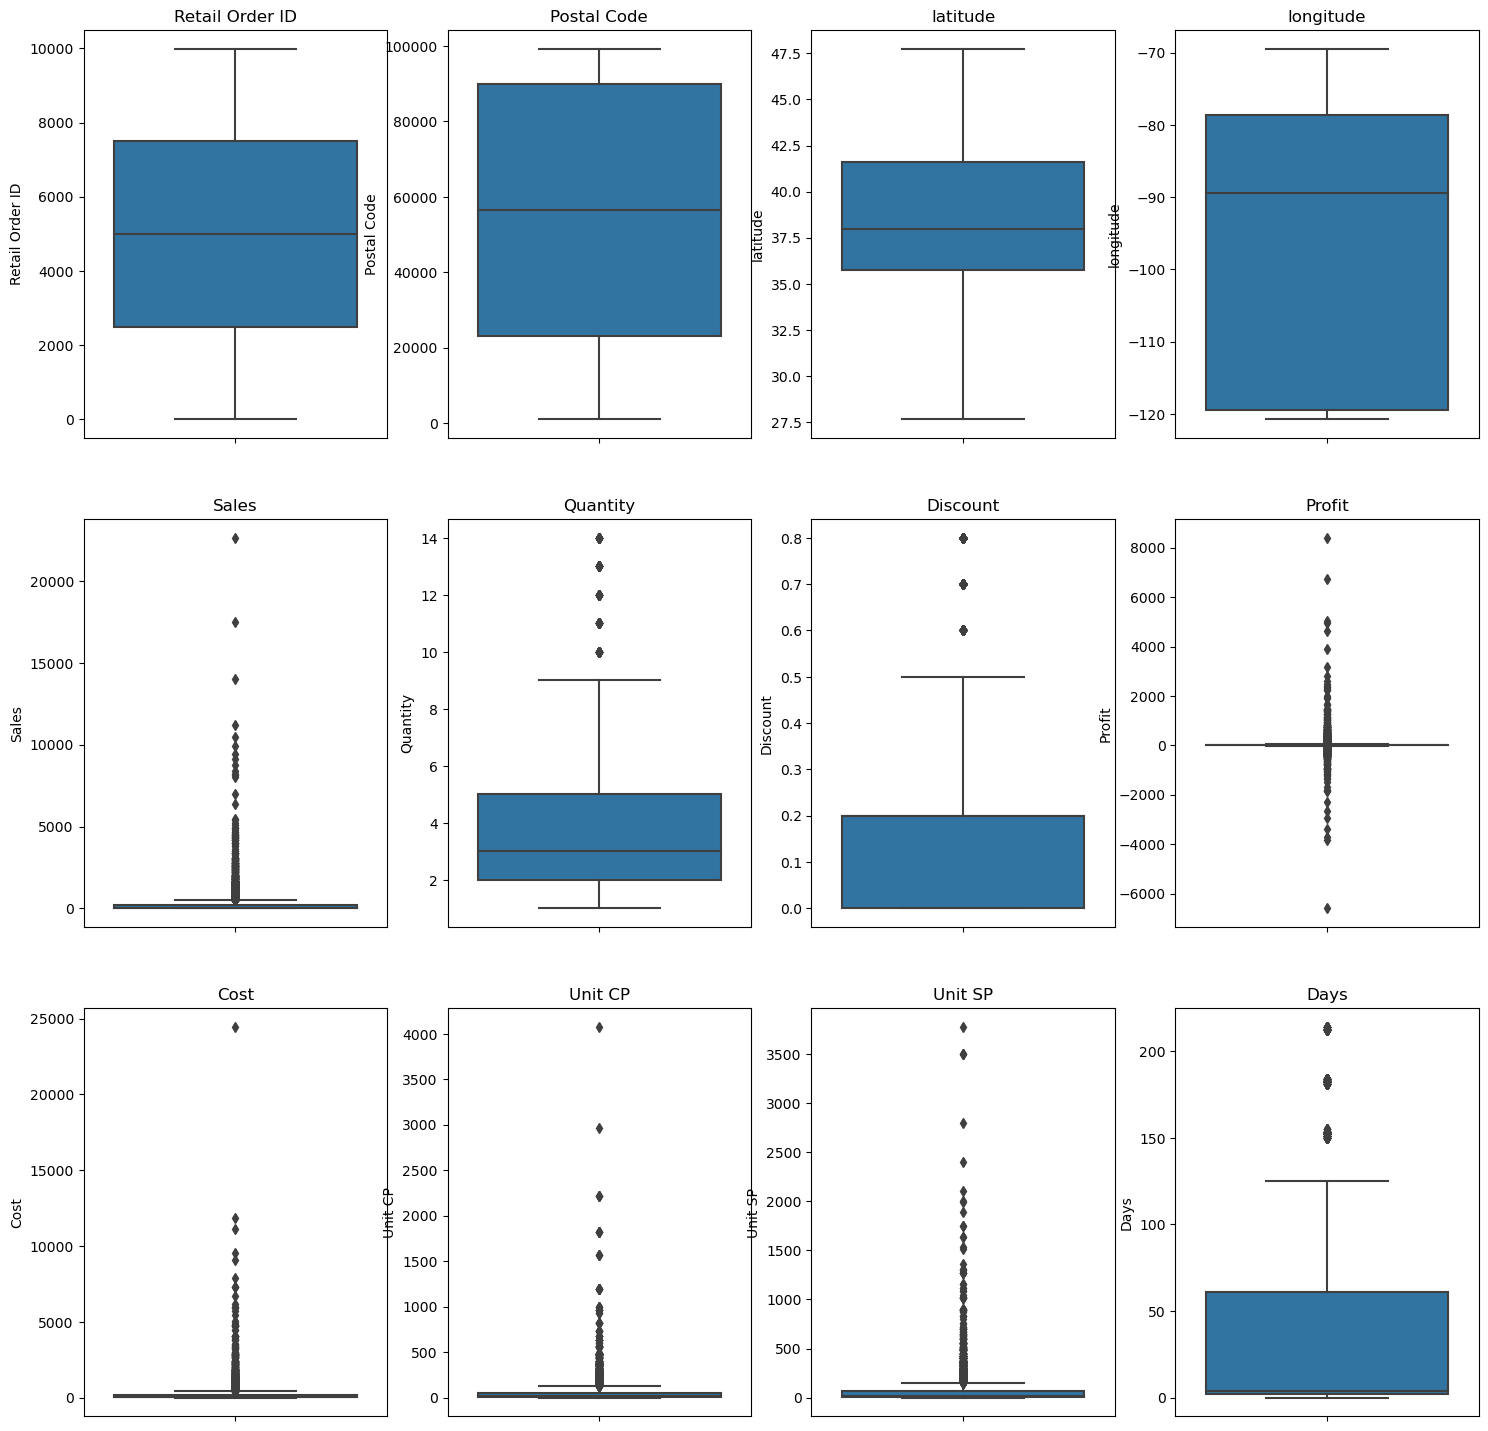

In [8]:
fig, axs = plt.subplots(3, 4, figsize=(18, 18))
axs = axs.flatten()
for i, col in enumerate(data._get_numeric_data().columns):
    sns.boxplot(data = data, y = data[col], ax = axs[i])
    axs[i].set_title(col)
plt.show()

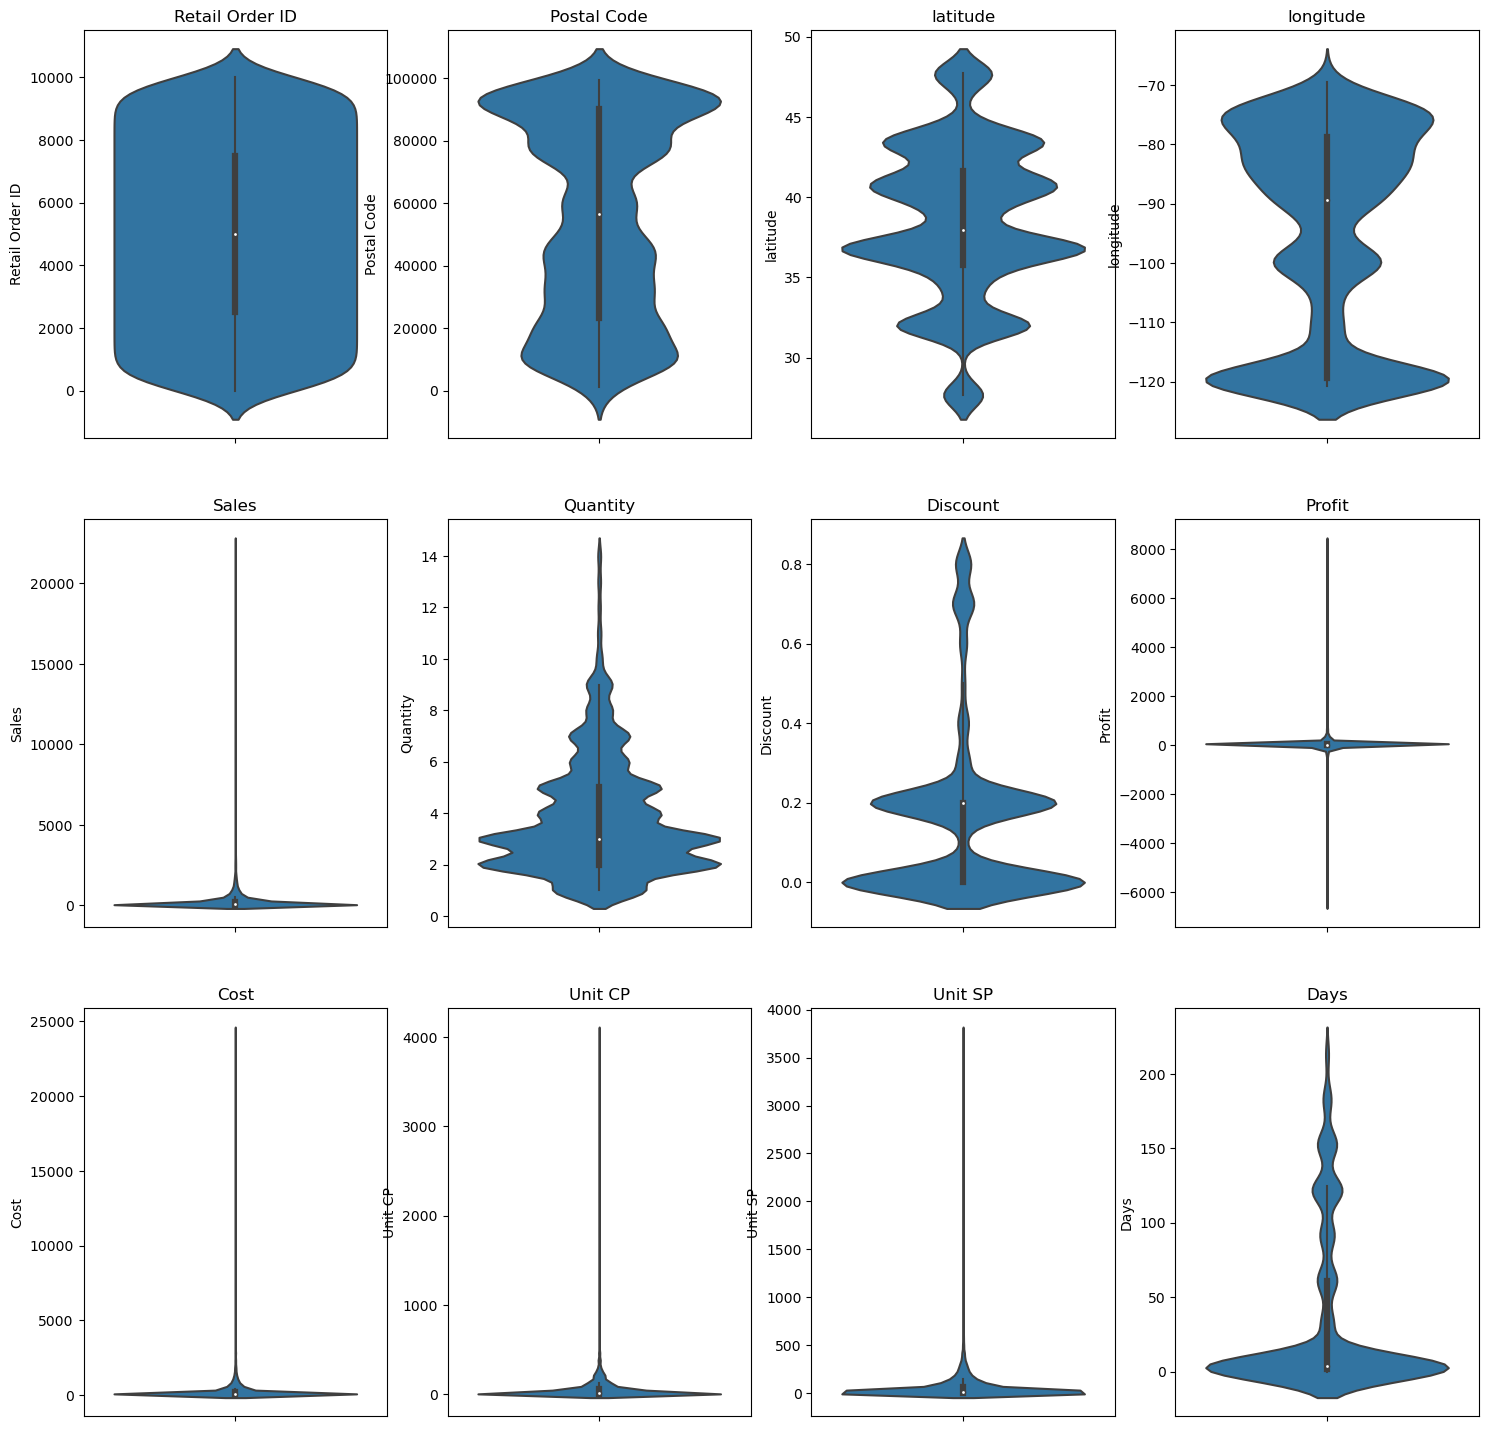

In [9]:
fig, axs = plt.subplots(3, 4, figsize=(18, 18))
axs = axs.flatten()
for i, col in enumerate(data._get_numeric_data().columns):
    sns.violinplot(y = col, data = data, ax=axs[i], orient='h')
    axs[i].set_title(col)
plt.show()

**Nhận xét:**
- Các giá trị ngày tháng phân bố đều trên các khoảng.
- Các giá trị liên quan đến việc bán vé và doanh thu phân bố tập trung ở mức thấp, và có rất nhiều giá trị ngoại lai.
- tickets_out hầu như đều có giá trị 0.
- ticket_price đa số đều có giá trị 80000

#### Đối với các cột kiểu categorical

In [10]:
def col_info(col, array):
    temp = pd.DataFrame(array[col])
    temp = temp.dropna()
    temp = np.array(temp[col])
    data = []
    # num_values
    temp = np.unique(temp, return_counts=True)
    data.append(len(temp[0]))
    # value
    temp = pd.Series(data = temp[1], index = temp[0])
    data.append(temp)
    # num_values
    return data

In [11]:
cat_col_info_df = pd.DataFrame(index = ['num_values', 'value'])
for i in data.select_dtypes(include=['object']):
    cat_col_info_df[i] = col_info(i, data)

cat_col_info_df

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Retail Sales People,Product ID,Product Name,Sub-Category,Category,Returned
num_values,5009,4,793,793,3,1,530,49,4,4,1862,1818,17,3,2
value,"CA-2014-100006 1 CA-2014-100090 2 CA-2014-100293 1 CA-2014-100328 1 CA-2014-100363 2 .. US-2017-168802 1 US-2017-169320 2 US-2017-169488 2 US-2017-169502 2 US-2017-169551 6 Length: 5009, dtype: int64",First Class 1538 Same Day 543 Second Class 1945 Standard Class 5968 dtype: int64,"AA-10315 11 AA-10375 15 AA-10480 12 AA-10645 18 AB-10015 6 .. XP-21865 28 YC-21895 8 YS-21880 12 ZC-21910 31 ZD-21925 9 Length: 793, dtype: int64","Aaron Bergman 6 Aaron Hawkins 11 Aaron Smayling 10 Adam Bellavance 18 Adam Hart 20 .. Xylona Preis 28 Yana Sorensen 12 Yoseph Carroll 8 Zuschuss Carroll 31 Zuschuss Donatelli 9 Length: 793, dtype: int64",Consumer 5191 Corporate 3020 Home Office 1783 dtype: int64,United States 9994 dtype: int64,"Aberdeen 1 Abilene 1 Akron 21 Albuquerque 14 Alexandria 16 .. Woonsocket 4 Yonkers 15 York 5 Yucaipa 1 Yuma 4 Length: 530, dtype: int64",Alabama 61 Arizona 224 Arkansas 60 California 2001 Colorado 182 Connecticut 82 Delaware 96 District of Columbia 10 Florida 383 Georgia 184 Idaho 21 Illinois 492 Indiana 149 Iowa 30 Kansas 24 Kentucky 139 Louisiana 42 Maine 8 Maryland 105 Massachusetts 135 Michigan 255 Minnesota 89 Mississippi 53 Missouri 66 Montana 15 Nebraska 38 Nevada 39 New Hampshire 27 New Jersey 130 New Mexico 37 New York 1128 North Carolina 249 North Dakota 7 Ohio 469 Oklahoma 66 Oregon 124 Pennsylvania 587 Rhode Island 56 South Carolina 42 South Dakota 12 Tennessee 183 Texas 985 Utah 53 Vermont 11 Virginia 224 Washington 506 West Virginia 4 Wisconsin 110 Wyoming 1 dtype: int64,Central 2323 East 2848 South 1620 West 3203 dtype: int64,Anna Andreadi 3203 Cassandra Brandow 1620 Chuck Magee 2848 Kelly Williams 2323 dtype: int64,"FUR-BO-10000112 1 FUR-BO-10000330 3 FUR-BO-10000362 5 FUR-BO-10000468 6 FUR-BO-10000711 2 .. TEC-PH-10004912 3 TEC-PH-10004922 5 TEC-PH-10004924 3 TEC-PH-10004959 2 TEC-PH-10004977 9 Length: 1862, dtype: int64","""While you Were Out"" Message Book, One Form per Page 3 #10 Gummed Flap White Envelopes, 100/Box 4 #10 Self-Seal White Envelopes 4 #10 White Business Envelopes,4 1/8 x 9 1/2 7 #10- 4 1/8"" x 9 1/2"" Recycled Envelopes 10 .. iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4 5 iOttie HLCRIO102 Car Mount 5 iOttie XL Car Mount 2 invisibleSHIELD by ZAGG Smudge-Free Screen Protector 7 netTALK DUO VoIP Telephone Service 7 Length: 1818, dtype: int64",Accessories 775 Appliances 466 Art 796 Binders 1523 Bookcases 228 Chairs 617 Copiers 68 Envelopes 254 Fasteners 217 Furnishings 957 Labels 364 Machines 115 Paper 1370 Phones 889 Storage 846 Supplies 190 Tables 319 dtype: int64,Furniture 2121 Office Supplies 6026 Technology 1847 dtype: int64,Not 9194 Yes 800 dtype: int64


Ta vẽ biểu đồ cột để trực quan sự phân bố các giá trị `categorical`.

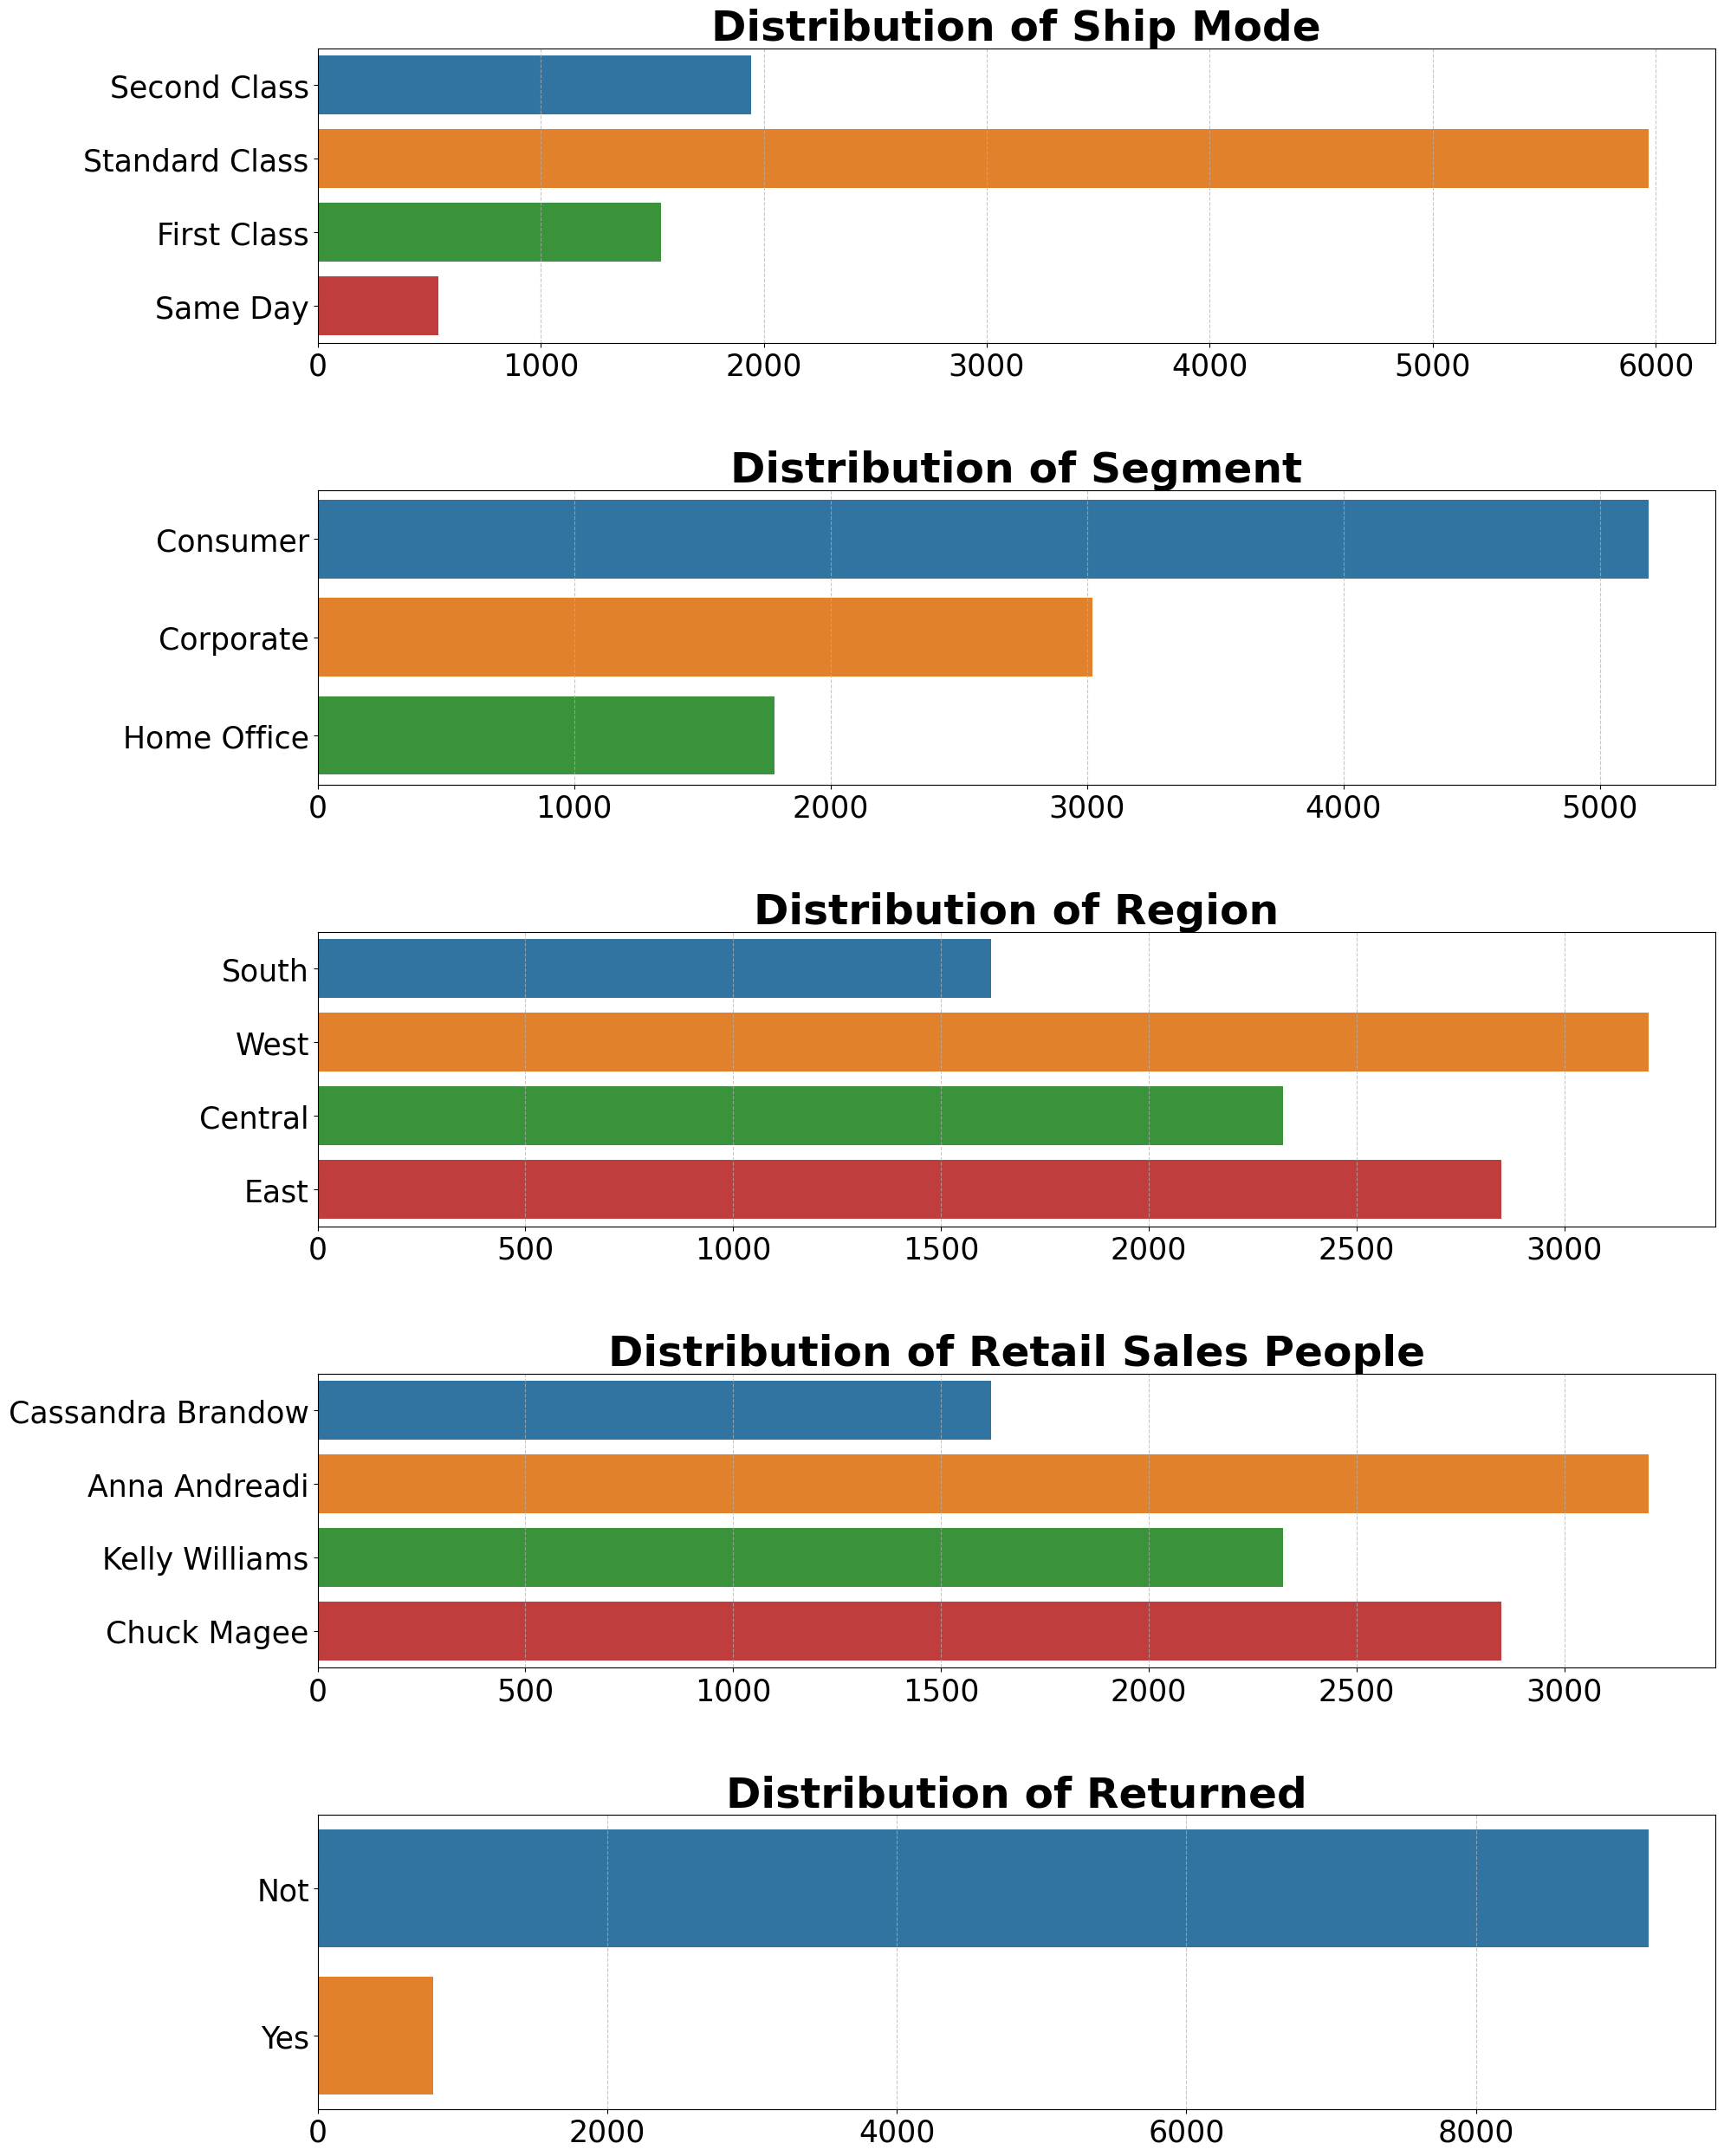

In [12]:
# Regex pattern để loại bỏ các cột có chứa các từ khóa cần loại bỏ
pattern = re.compile(r'ID|Name|City|State|Country|Category', re.IGNORECASE)

# Lọc các cột kiểu object nhưng không khớp với pattern
object_cols = [col for col in data.select_dtypes(include=['object']).columns if not pattern.search(col)]

# Xác định số hàng và số cột cho grid plot
n_cols = 1  # Số cột cố định
n_rows = -(-len(object_cols) // n_cols)  # Tính số hàng, làm tròn lên

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))  # Điều chỉnh chiều cao theo số hàng
axs = axs.flatten()  # Chuyển thành danh sách 1D để dễ truy cập

for i, col in enumerate(object_cols):
    sns.countplot(data=data, y=col, ax=axs[i])
    axs[i].set_title(f"Distribution of {col}", fontsize=35, fontweight="bold")  # Tăng size chữ tiêu đề
    axs[i].set_xlabel("")
    axs[i].set_ylabel("")
    axs[i].tick_params(axis='both', labelsize=25)  # Tăng size chữ các giá trị trên trục
    axs[i].grid(True, axis='x', linestyle="--", alpha=0.7)  # Thêm đường lưới dọc

# Ẩn các subplot thừa (nếu có)
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)  # Điều chỉnh khoảng cách giữa các hàng
plt.show()


**Nhận xét:**
- Bộ dữ liệu có tổng cộng 48 phim khác nhau và được tổng hợp dữ liệu bán vè từ 246 rạp chiếu phim.
- Không có tiêu chuẩn nào để nhận xét sự phân bố dữ liệu của 2 trường này.
- Số lượng giá trị của mỗi trường hay tần suất của mỗi giá trị trong trường không tuân theo bất kỳ nguyên tắc nào, hơn nữa, đây đều là những giá trị mã hóa, không mang lại ý nghĩa gì.
- Vậy nên chúng ta không cần quan tâm đến sự phân bố dữ liệu của 2 trường này.

## 3. Khám phá dữ liệu - EDA

## 4. Câu Hỏi Phân Tích Chính

### Thời gian giao hàng trung bình là bao nhiêu, và khu vực nào có thời gian giao hàng chậm nhất?

In [13]:
# Lọc mỗi đơn hàng chỉ giữ lại 1 dòng
filtered_data = data.drop_duplicates(subset=['Order ID'])
# Chỉ lấy ra những dòng cần thiết
filtered_data = filtered_data[['Order ID', 'City', 'State', 'Returned', 'Region', 'Days']]

In [14]:
# Thời gian giao hàng trung bình là bao nhiêu?
mean_delivery_day = filtered_data['Days'].mean()
print(f"Thời gian giao hàng trung bình là: {mean_delivery_day:.1f} ngày")

Thời gian giao hàng trung bình là: 34.6 ngày


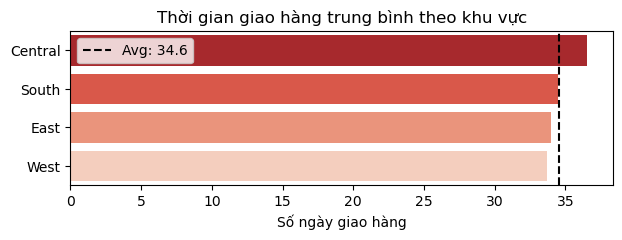

In [15]:
# Khu vực nào có thời gian giao hàng chậm nhất?
region_delivery = filtered_data.groupby(['Region'])['Days'].agg(['mean'])

# Sắp xếp giảm dần theo thời gian giao hàng trung bình
slowest = region_delivery.sort_values('mean', ascending=False).reset_index()

# Vẽ biểu đồ cho slowest
plt.figure(figsize=(7, 2))
sns.barplot(x=slowest['mean'], y=slowest['Region'], palette="Reds_r")

plt.axvline(mean_delivery_day, color='black', linestyle='dashed', label=f'Avg: {mean_delivery_day:.1f}')
plt.title("Thời gian giao hàng trung bình theo khu vực")
plt.xlabel("Số ngày giao hàng")
plt.ylabel("")
plt.legend()

plt.show()

### 4.2. Thời gian giao hàng ảnh hưởng như thế nào đến lợi nhuận?

### 4.3. Khu vực nào có tỷ lệ hoàn trả cao nhất?

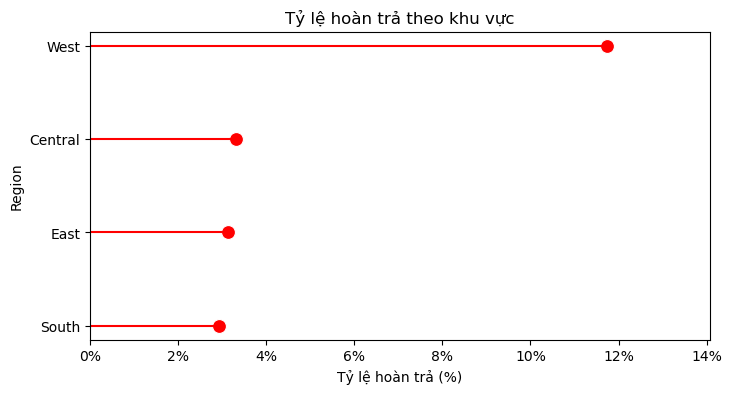

In [16]:
# Đếm tổng số đơn hàng và số đơn bị hoàn trả theo Region
region_orders = filtered_data.groupby('Region').size()
region_returns = filtered_data[filtered_data['Returned'] == 'Yes'].groupby('Region').size()

# Tính tỷ lệ hoàn trả
return_rate = (region_returns / region_orders).fillna(0).reset_index(name='return_rate')

# Sắp xếp dữ liệu theo tỷ lệ hoàn trả từ cao đến thấp
return_rate = return_rate.sort_values(by='return_rate', ascending=False)

plt.figure(figsize=(8, 4))
sns.scatterplot(x='return_rate', y='Region', data=return_rate, color='red', s=100)
plt.hlines(y=return_rate['Region'], xmin=0, xmax=return_rate['return_rate'], color='red')

plt.title("Tỷ lệ hoàn trả theo khu vực")
plt.xlabel("Tỷ lệ hoàn trả (%)")
plt.xlim(0, return_rate['return_rate'].max() * 1.2)  # Căn chỉnh trục
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))  # Không hiển thị số thập phân

plt.show()

### 4.4. Sản phẩm nào có tỷ lệ hoàn trả cao nhất, và các nguyên nhân chính là gì?

In [17]:
def highest_returned_rate(m = 0):
    # Nhóm dữ liệu theo 'Product Name' và tính số lượng đơn hàng cho mỗi sản phẩm
    product_counts = data.groupby('Product Name')['Returned'].count()

    # Lọc các sản phẩm có số lượng đơn hàng > m
    products_above_m = product_counts[product_counts > m]

    # Lấy dữ liệu chi tiết của các sản phẩm này
    temp = data[data['Product Name'].isin(products_above_m.index)]

    # Nhóm lại dữ liệu và tính tỷ lệ hoàn trả và số lượng đơn hàng cho các sản phẩm có số lượng đơn > m
    product_return_rate = temp.groupby(['Product Name', 'Sub-Category', 'Category'])['Returned'].value_counts(normalize=True).unstack(fill_value=0)

    # Tính tỷ lệ hoàn trả cho mỗi sản phẩm
    product_return_rate['return_rate'] = product_return_rate['Yes']

    # Đếm số lượng đơn hàng cho mỗi sản phẩm
    product_return_rate['order_count'] = data.groupby(['Product Name', 'Sub-Category', 'Category'])['Returned'].count()

    # Tính trung bình của cột 'Quantity' cho mỗi sản phẩm
    product_return_rate['Avg_Quantity'] = data.groupby(['Product Name', 'Sub-Category', 'Category'])['Quantity'].mean()

    # Đưa thông tin vào DataFrame mới để dễ đọc và sử dụng
    product_return_rate_df = product_return_rate.reset_index()

    # Chọn cột cần hiển thị
    product_return_rate_df = product_return_rate_df[['Product Name', 'Sub-Category', 'Category', 'return_rate', 'order_count', 'Avg_Quantity']]
    
    # Đổi tỷ lệ hoàn trả thành phần trăm
    product_return_rate_df['return_rate'] = product_return_rate_df['return_rate'] * 100

    # Sắp xếp theo tỷ lệ hoàn trả từ cao đến thấp
    product_return_rate_df_sorted = product_return_rate_df.sort_values(by='return_rate', ascending=False)

    # Đổi cột index thành Rank
    product_return_rate_df_sorted.reset_index(drop=True, inplace=True)
    
    # Nếu m = 0, lấy tất cả các sản phẩm có tỷ lệ hoàn trả cao nhất
    if m == 0:
        max_return_rate = product_return_rate_df_sorted['return_rate'].max()  # Lấy tỷ lệ hoàn trả cao nhất
        product_return_rate_df_sorted = product_return_rate_df_sorted[product_return_rate_df_sorted['return_rate'] == max_return_rate]  # Lọc tất cả các sản phẩm có tỷ lệ hoàn trả cao nhất
        return product_return_rate_df_sorted.head(10)
    else:
        return product_return_rate_df_sorted.head(5)
    
    # Hiển thị kết quả đã sắp xếp
    

In [18]:
highest_returned_rate()

Returned,Product Name,Sub-Category,Category,return_rate,order_count,Avg_Quantity
0,Okidata B401 Printer,Machines,Technology,100.0,1,3.0
1,"Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order",Bookcases,Furniture,100.0,1,1.0
2,Acco Glide Clips,Fasteners,Office Supplies,100.0,1,5.0
3,Hewlett-Packard Deskjet F4180 All-in-One Color Ink-jet - Printer / copier / scanner,Machines,Technology,100.0,1,2.0
4,Avery 500,Labels,Office Supplies,100.0,2,4.0
5,Zebra GK420t Direct Thermal/Thermal Transfer Printer,Machines,Technology,100.0,1,6.0
6,"Canon Color ImageCLASS MF8580Cdw Wireless Laser All-In-One Printer, Copier, Scanner",Machines,Technology,100.0,1,3.0
7,Cisco SPA 501G IP Phone,Phones,Technology,100.0,1,3.0


In [19]:
highest_returned_rate(10)

Returned,Product Name,Sub-Category,Category,return_rate,order_count,Avg_Quantity
0,Prang Drawing Pencil Set,Art,Office Supplies,27.272727,11,3.545455
1,Wilson Jones Easy Flow II Sheet Lifters,Binders,Office Supplies,25.000000,12,4.083333
2,Avery Durable Binders,Binders,Office Supplies,25.000000,12,4.166667
3,Staple holder,Appliances,Office Supplies,23.076923,13,4.000000
4,KI Adjustable-Height Table,Tables,Furniture,22.222222,18,4.111111


### 4.5. Xu hướng doanh thu và lợi nhuận theo thời gian (hàng năm, hàng quý, hàng tháng) như thế nào?

In [20]:
# Lọc dữ liệu chỉ giữ những dòng có 'Returned' là 'Not'
filtered_data = data[data['Returned'] == 'Not']

In [21]:
# Lấy ngày nhỏ nhất và ngày lớn nhất từ cột 'Ship Date'
min_date = data['Order Date'].min()
max_date = data['Order Date'].max()

print(f"Dữ liệu được lấy từ ngày {min_date.strftime('%d-%m-%Y')} tới ngày {max_date.strftime('%d-%m-%Y')}")


Dữ liệu được lấy từ ngày 02-01-2014 tới ngày 30-12-2017


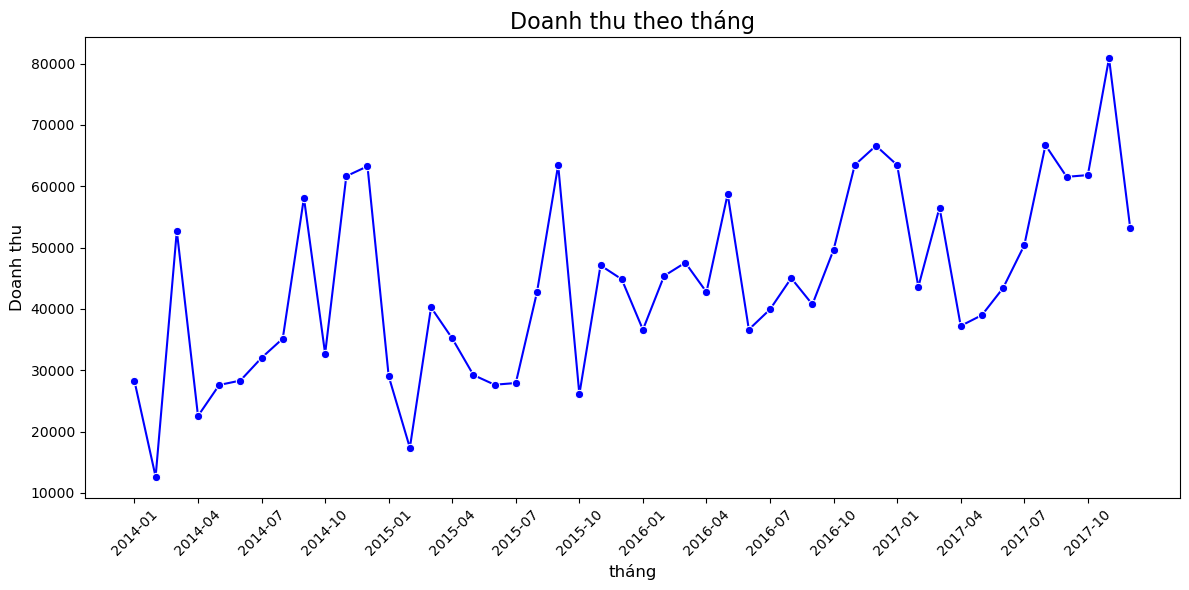

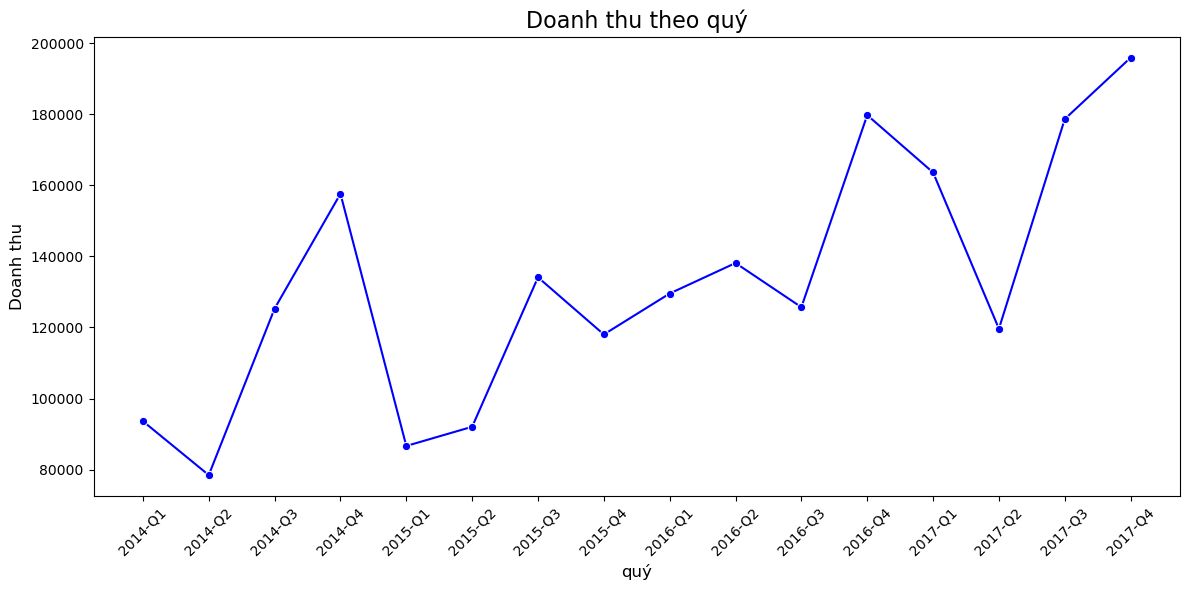

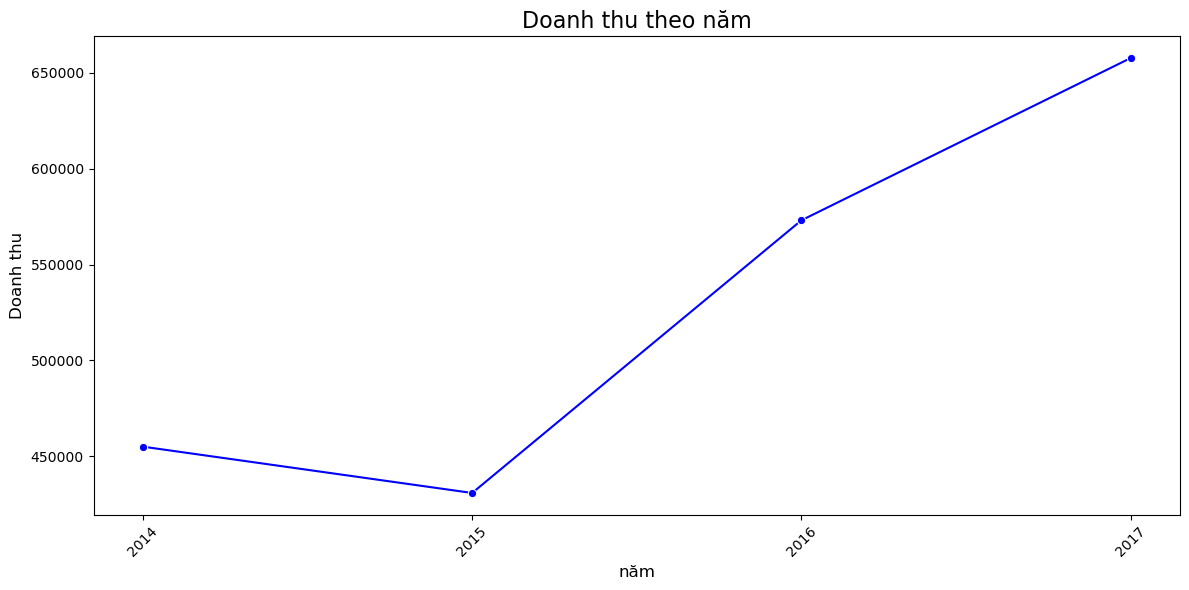

In [22]:
# Dictionary ánh xạ period với tên phân kỳ và định dạng thời gian
period_dict = {
    'M': {'name': 'tháng', 'freq': 'M', 'format': '%Y-%m'},
    'Q': {'name': 'quý', 'freq': 'Q', 'format': '%Y-Q%q'},
    'Y': {'name': 'năm', 'freq': 'Y', 'format': '%Y'}
}

def Revenue_by_Period(data, period='M'):

    # Kiểm tra xem period có hợp lệ không
    if period not in period_dict:
        raise ValueError("Invalid period. Choose from 'M', 'Q', or 'Y'.")
    
    # Lấy thông tin từ dictionary
    period_info = period_dict[period]
    period_name = period_info['name']
    period_format = period_info['format']
    
    # Tính doanh thu theo period
    period_revenue = data.groupby(data['Order Date'].dt.to_period(period_info['freq']))['Sales'].sum().reset_index()
    period_revenue['Period'] = period_revenue['Order Date'].dt.strftime(period_format)

    # Vẽ biểu đồ
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Period', y='Sales', data=period_revenue, marker='o', color='blue')
    
    # Cài đặt tiêu đề và nhãn
    plt.title(f'Doanh thu theo {period_name}', fontsize=16)
    plt.xlabel(f'{period_name}', fontsize=12)
    plt.ylabel('Doanh thu', fontsize=12)
    
    # Chỉnh sửa trục x để chỉ hiển thị 3 tháng một lần (chỉ đối với 'M')
    if period == 'M':
        ticks = period_revenue['Period'][::3]
        plt.xticks(ticks, rotation=45)
    else:
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    
    # Hiển thị biểu đồ
    plt.show()

    # Trả về dữ liệu doanh thu theo period
    return period_revenue

# Sử dụng hàm:
# Doanh thu theo tháng
revenue_month = Revenue_by_Period(filtered_data, 'M')

# Doanh thu theo quý
revenue_quarter = Revenue_by_Period(filtered_data, 'Q')

# Doanh thu theo năm
revenue_year = Revenue_by_Period(filtered_data, 'Y')

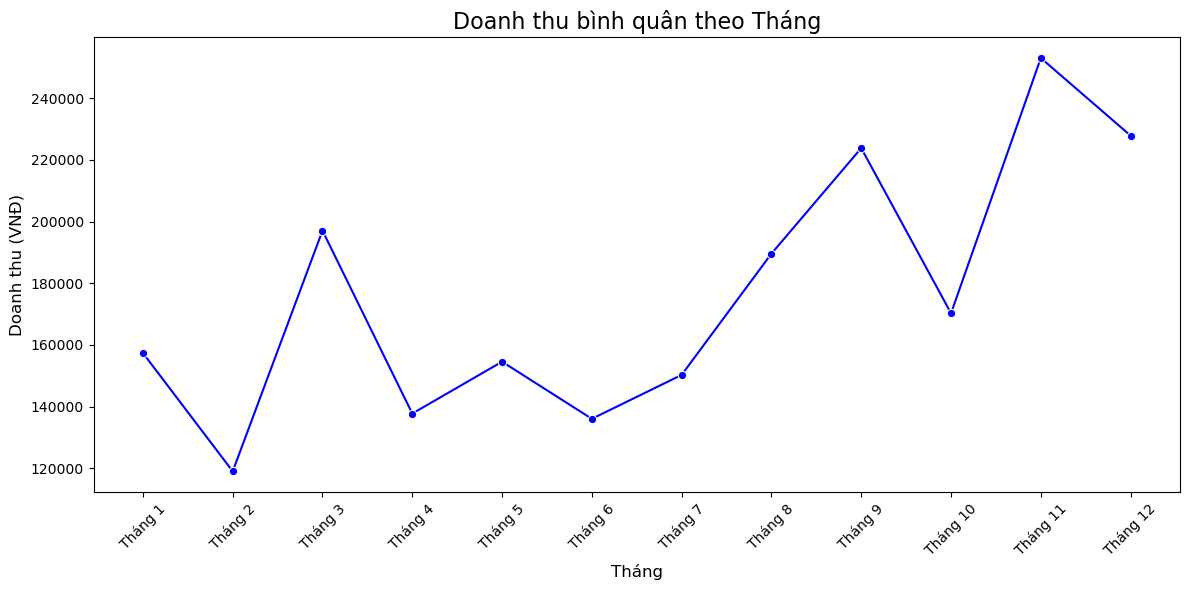

In [36]:
def avg_by_month():
    # Thêm một cột 'Month' chỉ chứa tháng (không bao gồm năm)
    filtered_data['Month'] = filtered_data['Order Date'].dt.strftime('%m')  # Chỉ lấy tháng

    # Tính tổng doanh thu theo tháng
    month_revenue = filtered_data.groupby('Month')['Sales'].sum().reset_index()

    # Vẽ biểu đồ
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Month', y='Sales', data=month_revenue, marker='o', color='blue')

    # Cài đặt tiêu đề và nhãn
    plt.title('Doanh thu bình quân theo Tháng', fontsize=16)
    plt.xlabel('Tháng', fontsize=12)
    plt.ylabel('Doanh thu (VNĐ)', fontsize=12)

    # Đảm bảo trục X chỉ hiển thị tháng 1-12
    plt.xticks(ticks=[str(i).zfill(2) for i in range(1, 13)], labels=['Tháng ' + str(i) for i in range(1, 13)], rotation=45)

    plt.tight_layout()

    # Hiển thị biểu đồ
    plt.show()
    
avg_by_month()

### 4.6. 5 khu vực nào có doanh thu cao nhất và thấp nhất?

Do `Region` chỉ có 4 khu vực nên đoạn này sẽ dùng `State` để phân tích.

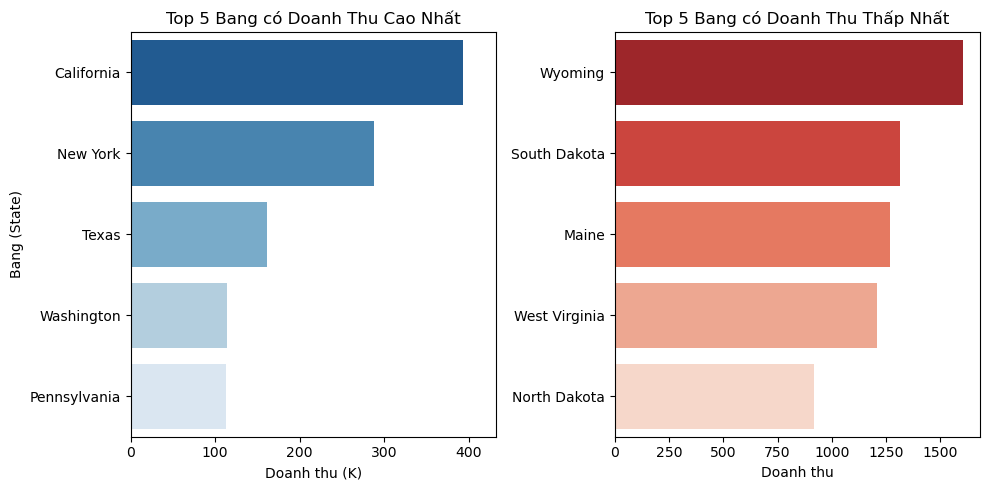

In [24]:
# Nhóm dữ liệu theo 'State' và tính tổng Sales
state_sales = filtered_data.groupby('State')['Sales'].sum().reset_index()

# Sắp xếp theo doanh thu giảm dần
state_sales_sorted = state_sales.sort_values(by='Sales', ascending=False)

# Lấy top 5 cao nhất và thấp nhất
top_highest = state_sales_sorted.head(5)
top_lowest = state_sales_sorted.tail(5)

# Tạo figure với 2 biểu đồ ngang
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Vẽ biểu đồ top 5 cao nhất
sns.barplot(y=top_highest['State'], x=top_highest['Sales'] / 1000, palette="Blues_r", ax=axs[0])
axs[0].set_title("Top 5 Bang có Doanh Thu Cao Nhất")
axs[0].set_xlabel("Doanh thu (K)")
axs[0].set_ylabel("Bang (State)")
axs[0].set_xlim(0, top_highest['Sales'].max() / 1000 * 1.1)  # Giới hạn trục x riêng

# Vẽ biểu đồ top 5 thấp nhất
sns.barplot(y=top_lowest['State'], x=top_lowest['Sales'], palette="Reds_r", ax=axs[1])
axs[1].set_title("Top 5 Bang có Doanh Thu Thấp Nhất")
axs[1].set_xlabel("Doanh thu")
axs[1].set_ylabel("")
# axs[1].set_xlim(0, top_lowest['Sales'].max() * 1.1)  # Giới hạn trục x riêng

# Căn chỉnh layout
plt.tight_layout()
plt.show()

### 4.7. Những sản phẩm nào có doanh số cao nhất và thấp nhất?

In [25]:
# Nhóm dữ liệu theo 'Product Name' và tính tổng Sales
product_sales = filtered_data.groupby('Product Name')['Sales'].sum().reset_index()

# Sắp xếp theo doanh thu giảm dần và lấy top 5 cao nhất & thấp nhất
top_highest_products = product_sales.nlargest(5, 'Sales')
top_lowest_products = product_sales.nsmallest(5, 'Sales')

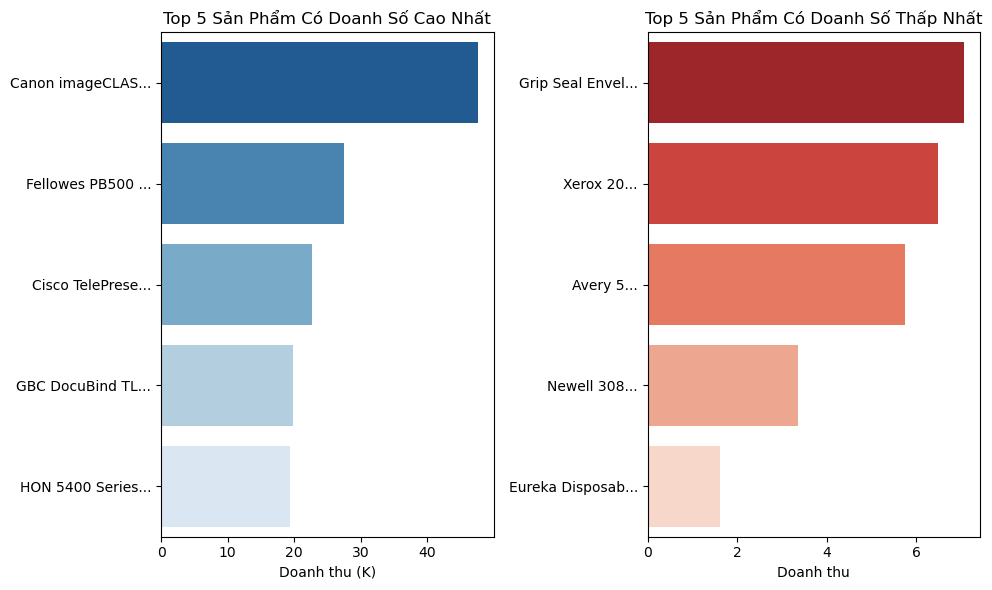

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Thêm cột rút gọn tên sản phẩm
top_highest_products['Short Name'] = top_highest_products['Product Name'].str[:15] + '...'
top_lowest_products['Short Name'] = top_lowest_products['Product Name'].str[:15] + '...'

# Top 5 sản phẩm có doanh thu cao nhất
sns.barplot(y=top_highest_products.sort_values(by='Sales', ascending=False)['Short Name'], 
            x=top_highest_products['Sales'] / 1000, palette="Blues_r", ax=axs[0])
axs[0].set_title("Top 5 Sản Phẩm Có Doanh Số Cao Nhất")
axs[0].set_xlabel("Doanh thu (K)")
axs[0].set_ylabel("")

# Top 5 sản phẩm có doanh thu thấp nhất
sns.barplot(y=top_lowest_products.sort_values(by='Sales', ascending=False)['Short Name'], 
            x=top_lowest_products['Sales'], palette="Reds_r", ax=axs[1])
axs[1].set_title("Top 5 Sản Phẩm Có Doanh Số Thấp Nhất")
axs[1].set_xlabel("Doanh thu")
axs[1].set_ylabel("")

plt.tight_layout()
plt.show()


### 4.8. Phân khúc khách hàng nào đóng góp nhiều nhất vào tổng doanh thu?

In [27]:
# Nhóm dữ liệu theo phân khúc khách hàng và tính tổng doanh thu
segment_sales = filtered_data.groupby('Segment')['Sales'].sum().reset_index()

# Sắp xếp theo doanh thu giảm dần để tìm phân khúc đóng góp nhiều nhất
segment_sales = segment_sales.sort_values(by='Sales', ascending=False)

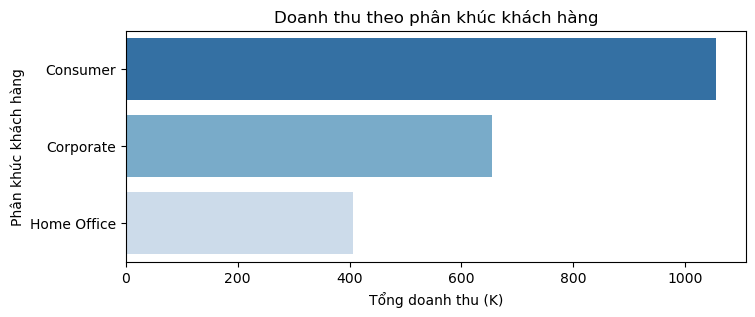

In [34]:
plt.figure(figsize=(8, 3))
sns.barplot(x=segment_sales['Sales'] / 1000, y=segment_sales['Segment'], palette="Blues_r")

plt.title("Doanh thu theo phân khúc khách hàng")
plt.xlabel("Tổng doanh thu (K)")
plt.ylabel("Phân khúc khách hàng")

plt.show()

### 4.9. Tính mùa vụ ảnh hưởng đến doanh số như thế nào? Xác định các giai đoạn cao điểm và thấp điểm. 

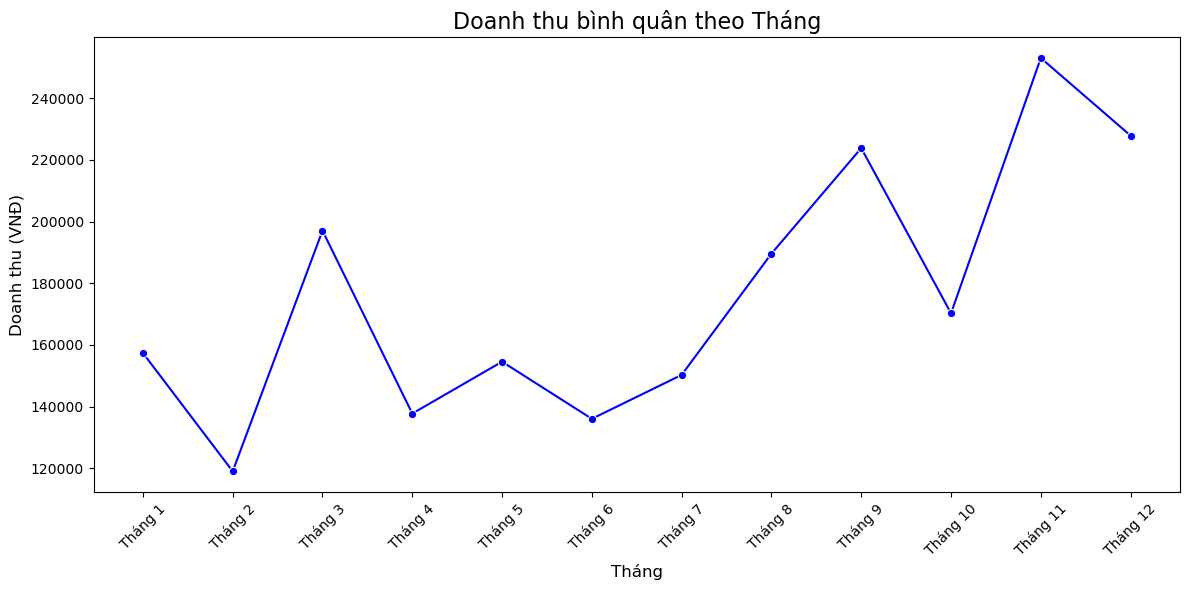

In [37]:
avg_by_month()

### 4.10. Dự báo doanh thu của quý tiếp theo dựa trên dữ liệu hiện tại.